##### Write a Python script to analyze a dataset and demonstrate:  
  a. The impact of outliers on the mean, median, and mode.  
  b. How these measures can be used to summarize data effectively.  
  Steps  
      a. Create a dataset with outliers.  
      b. Calculate and compare the central tendency measures before and after outlier removal.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Step 1: Create a dataset with outliers
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=10, size=100)
outliers = np.array([150, 160, 170])  # extreme outliers
data_with_outliers = np.concatenate((normal_data, outliers))

# Convert to a pandas DataFrame for convenience
df = pd.DataFrame(data_with_outliers, columns=['Value'])

In [5]:
df

,Value
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466
...,...
98,50.051135
99,47.654129
100,150.000000
101,160.000000


In [7]:
# Step 2: Calculate central tendency measures before removing outliers
mean_before = df['Value'].mean()
median_before = df['Value'].median()
mode_before = df['Value'].mode().iloc[0]

In [9]:
# Step 3: Remove outliers using z-score method
z_scores = np.abs(stats.zscore(df['Value']))
df_no_outliers = df[z_scores < 3]


In [11]:
# Step 4: Calculate central tendency measures after removing outliers
mean_after = df_no_outliers['Value'].mean()
median_after = df_no_outliers['Value'].median()
mode_after = df_no_outliers['Value'].mode().iloc[0]

Before Outlier Removal:
Mean  : 52.20
Median: 49.28
Mode  : 23.80

After Outlier Removal:
Mean  : 48.96
Median: 48.73
Mode  : 23.80


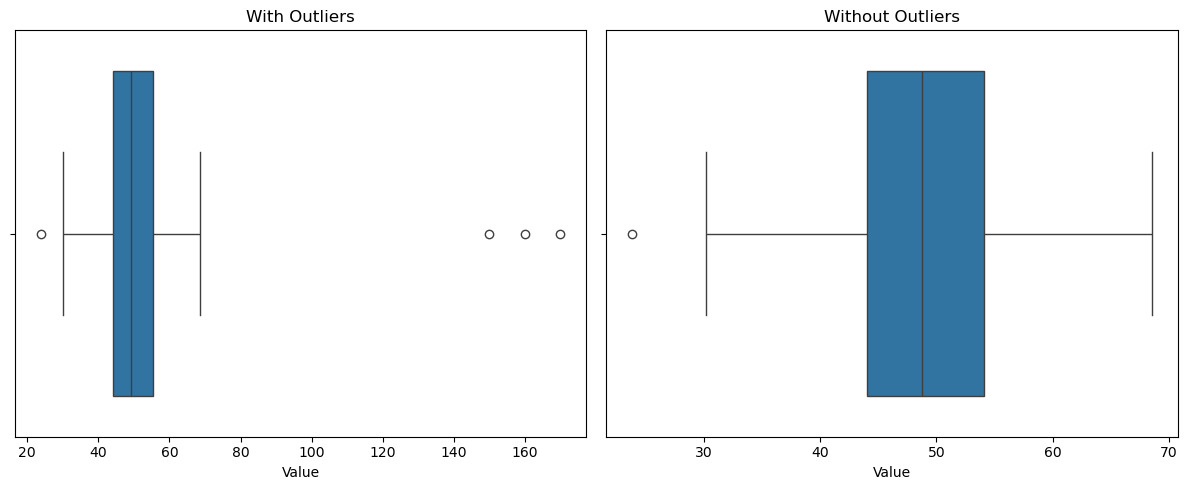

In [13]:
# print the results
print("Before Outlier Removal:")
print(f"Mean  : {mean_before:.2f}")
print(f"Median: {median_before:.2f}")
print(f"Mode  : {mode_before:.2f}")

print("\nAfter Outlier Removal:")
print(f"Mean  : {mean_after:.2f}")
print(f"Median: {median_after:.2f}")
print(f"Mode  : {mode_after:.2f}")

# Plot for visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Value')
plt.title("With Outliers")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers, x='Value')
plt.title("Without Outliers")

plt.tight_layout()
plt.show()